In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

### 1. Data Understanding and Exploration:

#### Load and explore the dataset to understand its structure, variables, and quality.

In [2]:
df = pd.read_csv("C:/Users/conta/OneDrive/Desktop/PowerPulse/household_power_consumption.txt", sep=';',na_values="?")
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


#### Perform exploratory data analysis (EDA) to identify patterns, correlations, and outliers.

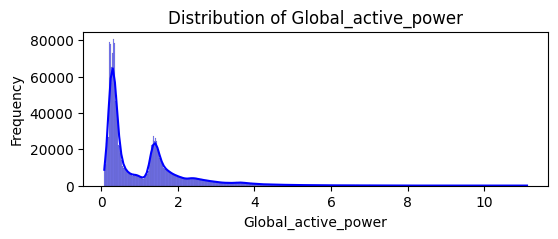

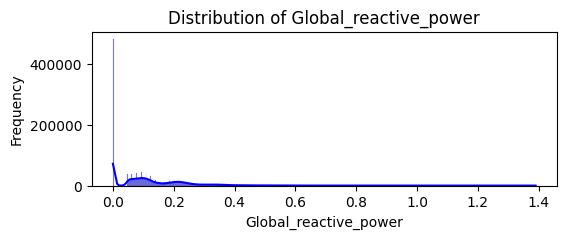

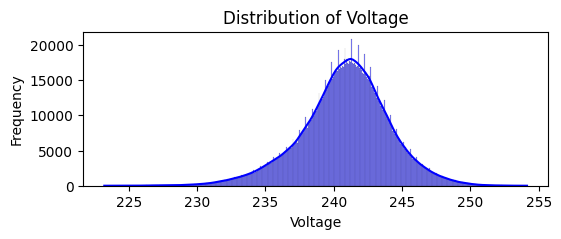

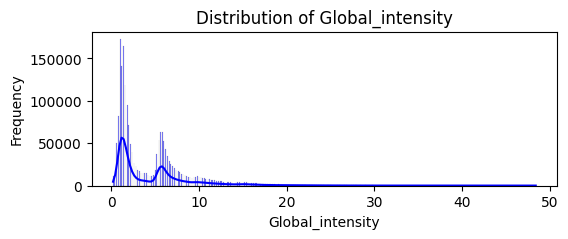

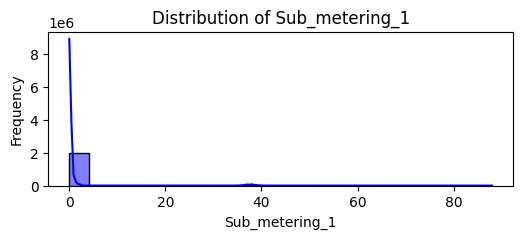

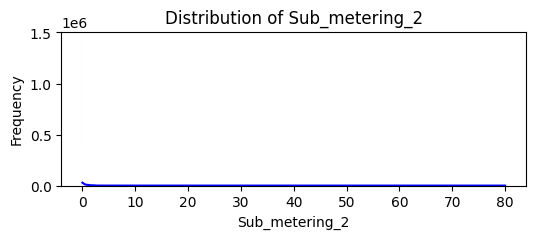

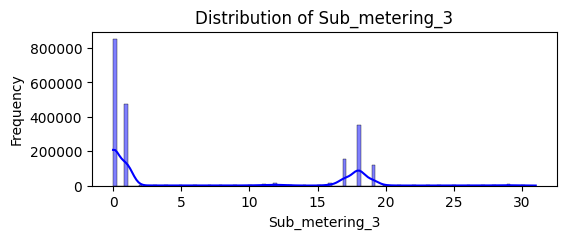

In [4]:
# Uni-variate Analysis -- Create distribution plots
cols = df.drop(columns=['Date','Time']).columns 
for icol in cols:
    plt.figure(figsize=(6, 2))
    sns.histplot(df[icol], kde=True, color='blue')
    plt.title(f'Distribution of {icol}')
    plt.xlabel(icol)
    plt.ylabel('Frequency')
    plt.show()

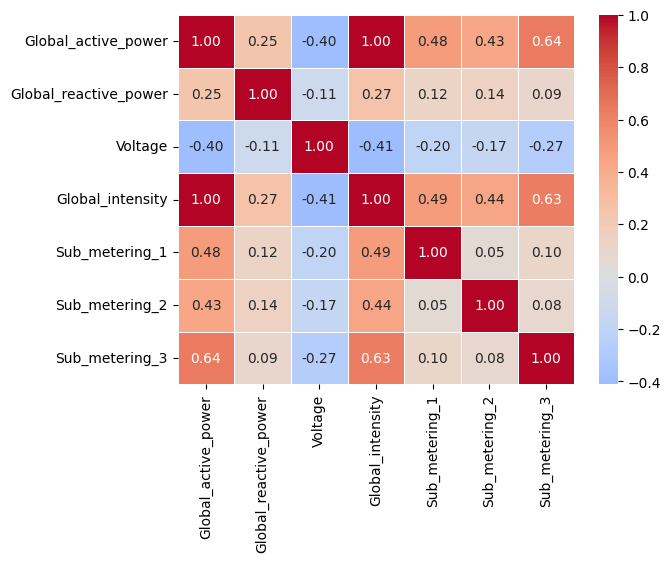

In [5]:
# Bi-variate analysis -- Understanding relationship between the variables
corr_matrix = df.select_dtypes(include="float64").corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)

# display the plot
plt.show()

1. Global_active_power and Global_intensity (Correlation: 1.0)
- The perfect positive correlation indicates that these variables are essentially measuring the same phenomenon. Global_intensity seems to be directly proportional to power consumption.
- Insight: Managing Global_intensity through load balancing or efficient distribution could effectively control Global_active_power, optimizing energy usage.

2. Global_active_power and Sub_metering_3 (Correlation: 0.64)
- This strong positive relationship suggests a significant portion of power consumption is attributed to Sub_metering_3 devices.
- Insight: Investigating Sub_metering_3 devices (such as specific appliances or areas in the network) for energy efficiency improvements could reduce overall active power consumption.

3. Voltage and Global_active_power (Correlation: -0.4)
- A moderate negative correlation signifies that as power usage rises, voltage tends to drop.
- Insight: This could indicate a system under stress when high power loads are applied, potentially leading to inefficiencies or risks. Voltage stabilization mechanisms could enhance performance.

4. Voltage and Global_intensity (Correlation: -0.41)
- Similar to the above, voltage drops align with increased intensity. This is indicative of possible issues with the system's ability to handle increased loads efficiently.
- Insight: Improving voltage regulation could help maintain stability during periods of high energy intensity.

5. Global_active_power with Sub_metering_1 (Correlation: 0.48) and Sub_metering_2 (Correlation: 0.43)
- While not as strong as Sub_metering_3, these moderate positive correlations indicate that these sub-metering zones contribute significantly to active power usage.
- Insight: Identifying energy wastage or inefficiencies in Sub_metering_1 and Sub_metering_2 zones could reveal opportunities for energy conservation.

6. Sub_metering Relationships
- The negligible correlation between Sub_metering_1, Sub_metering_2, and Sub_metering_3 suggests minimal direct influence on each other. Each might represent distinct zones or types of devices.
- Insight: Custom energy-saving strategies could be applied to each sub-metering area, as they operate independently.

7. Global_reactive_power
- The weak correlations involving Global_reactive_power indicate its lesser contribution to system behavior.
- Insight: While reactive power is essential for electrical system stability, optimizing it might not significantly affect active power or intensity.

**Conclusion**

This analysis reveals key areas for potential improvement:
- Voltage regulation and stabilization.
- Optimization of Sub_metering_3 devices.
- Investigating Sub_metering_1 and Sub_metering_2 for energy-saving opportunities.
- Targeted load management for Global_intensity.

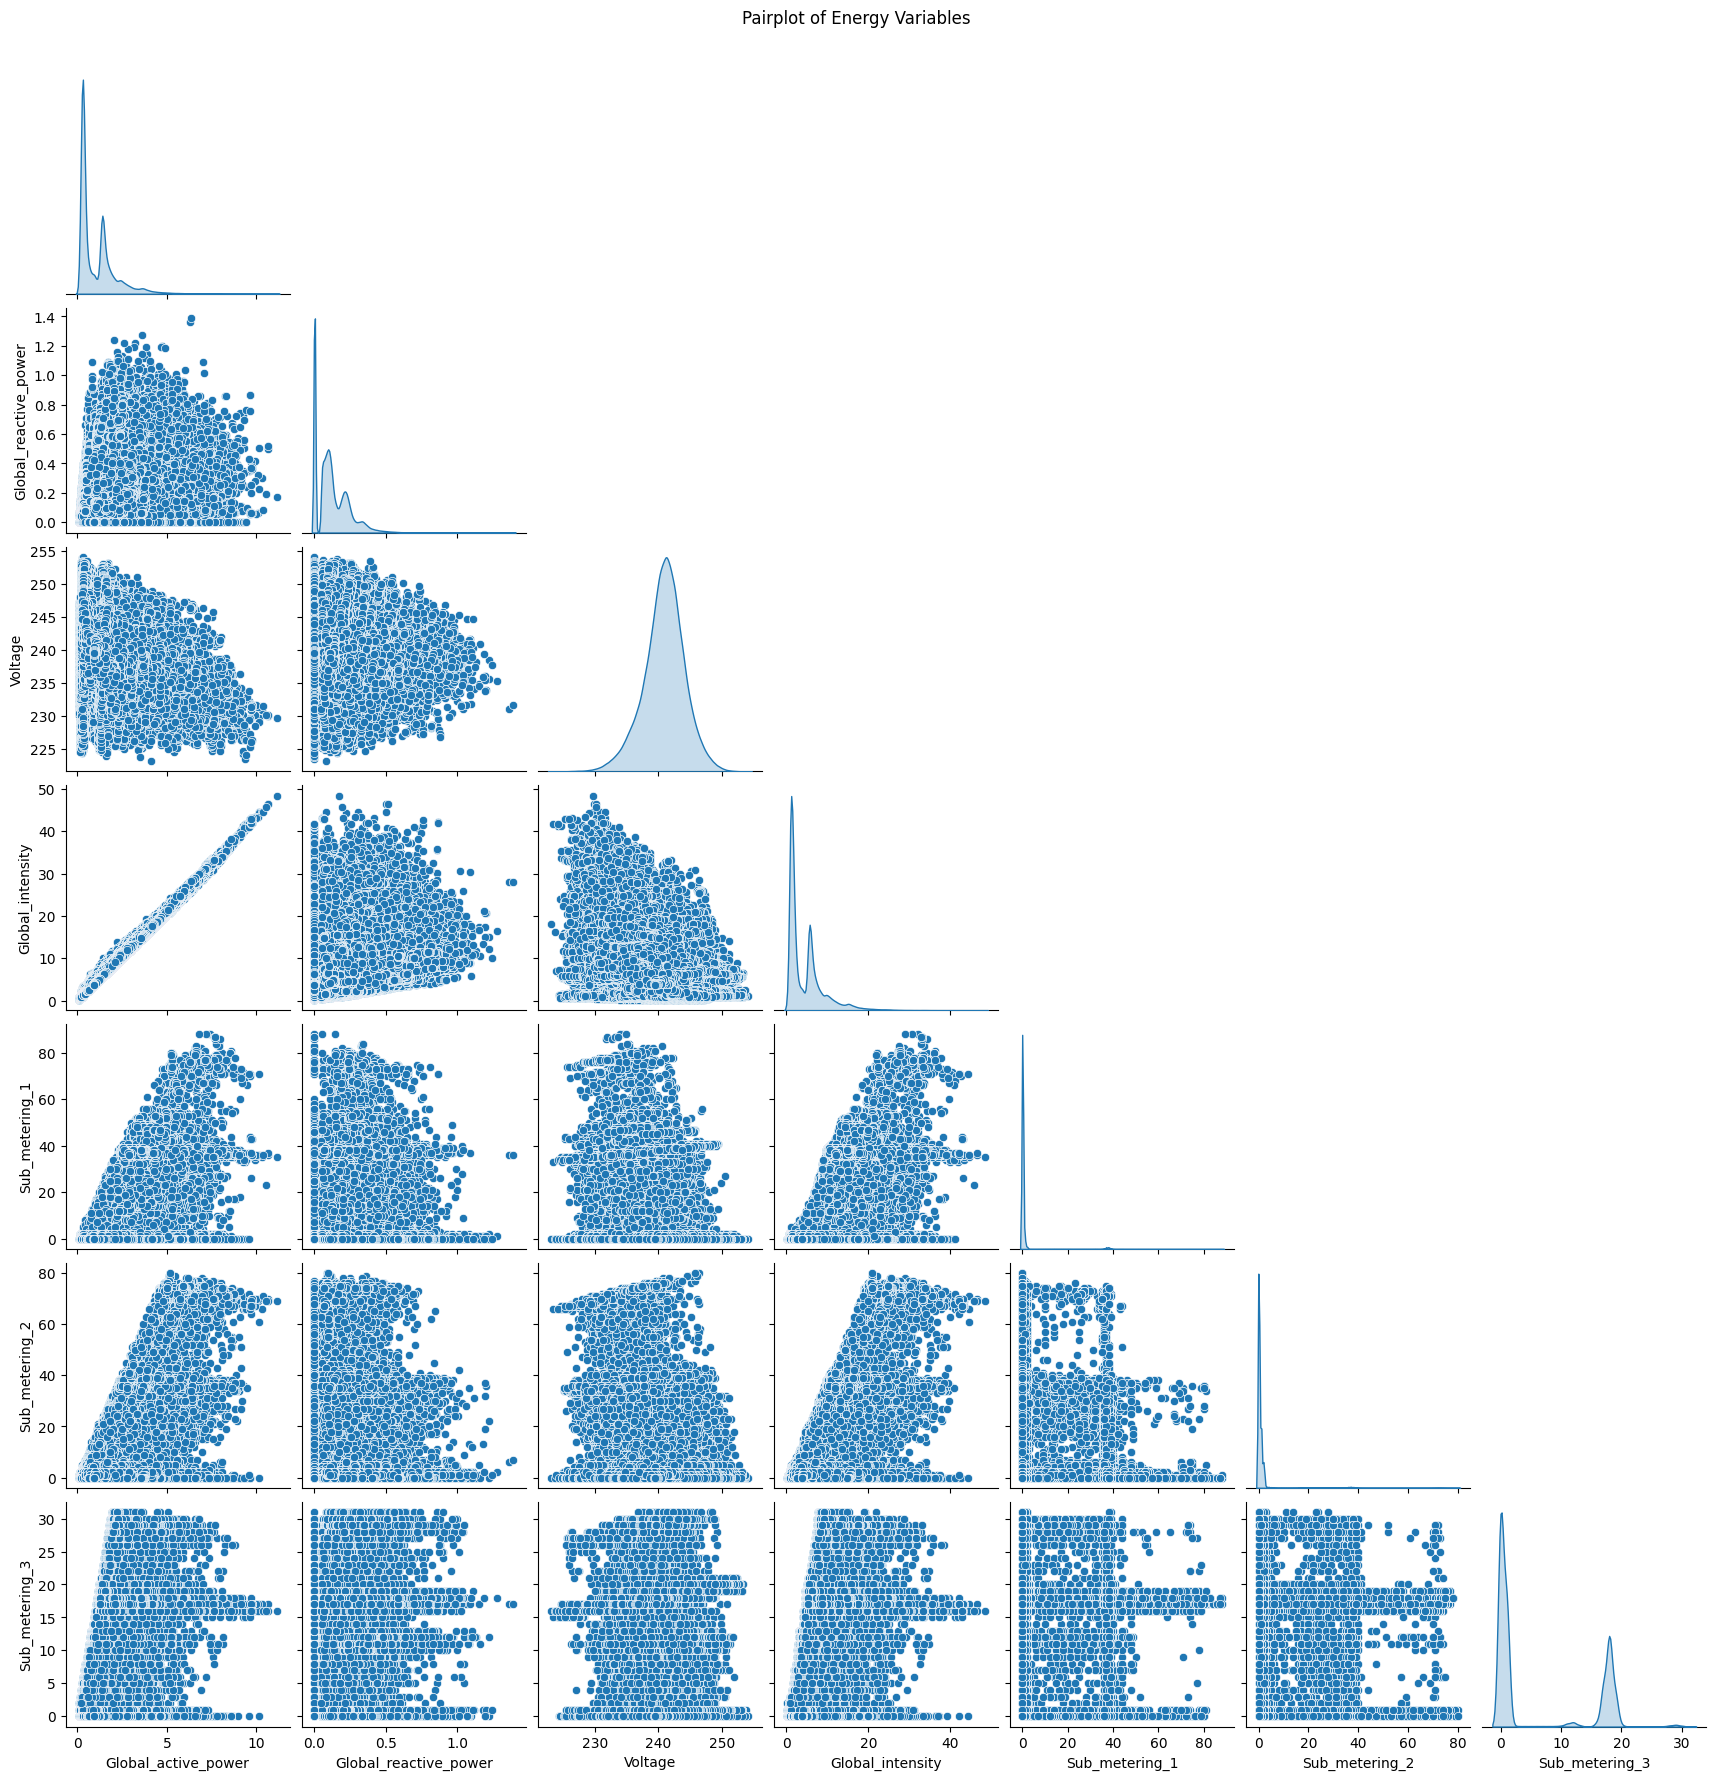

In [6]:
# Summary of Analysis
sns.pairplot(df, diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Energy Variables", y=1.02)
plt.show()

**Scatter Plots (Bivariate Analysis):**

1.	Global_active_power vs. Global_intensity: Clear linear relationship, reaffirming the strong positive correlation noted in previous analyses.
2.	Global_active_power vs. Voltage: Displays a slightly downward trend, indicative of a moderate negative correlation. Higher power usage corresponds to slight drops in voltage.
3.	Sub_metering Relationships:	Scatter plots between Sub_metering variables show weak or negligible relationships, suggesting independent operation across zones.
4.	Global_reactive_power: Scatter plots between reactive power and other variables reveal weak correlations, reinforcing its limited influence on overall system behavior.

**Key Insights:**

The pairplot is consistent with previous analyses and provides clarity on energy consumption patterns, correlations, and deviations. The prominent linear relationship between Global_active_power and Global_intensity suggests opportunities for targeted load balancing. The distributions of Sub_metering variables hint at potential optimization zones for energy savings.


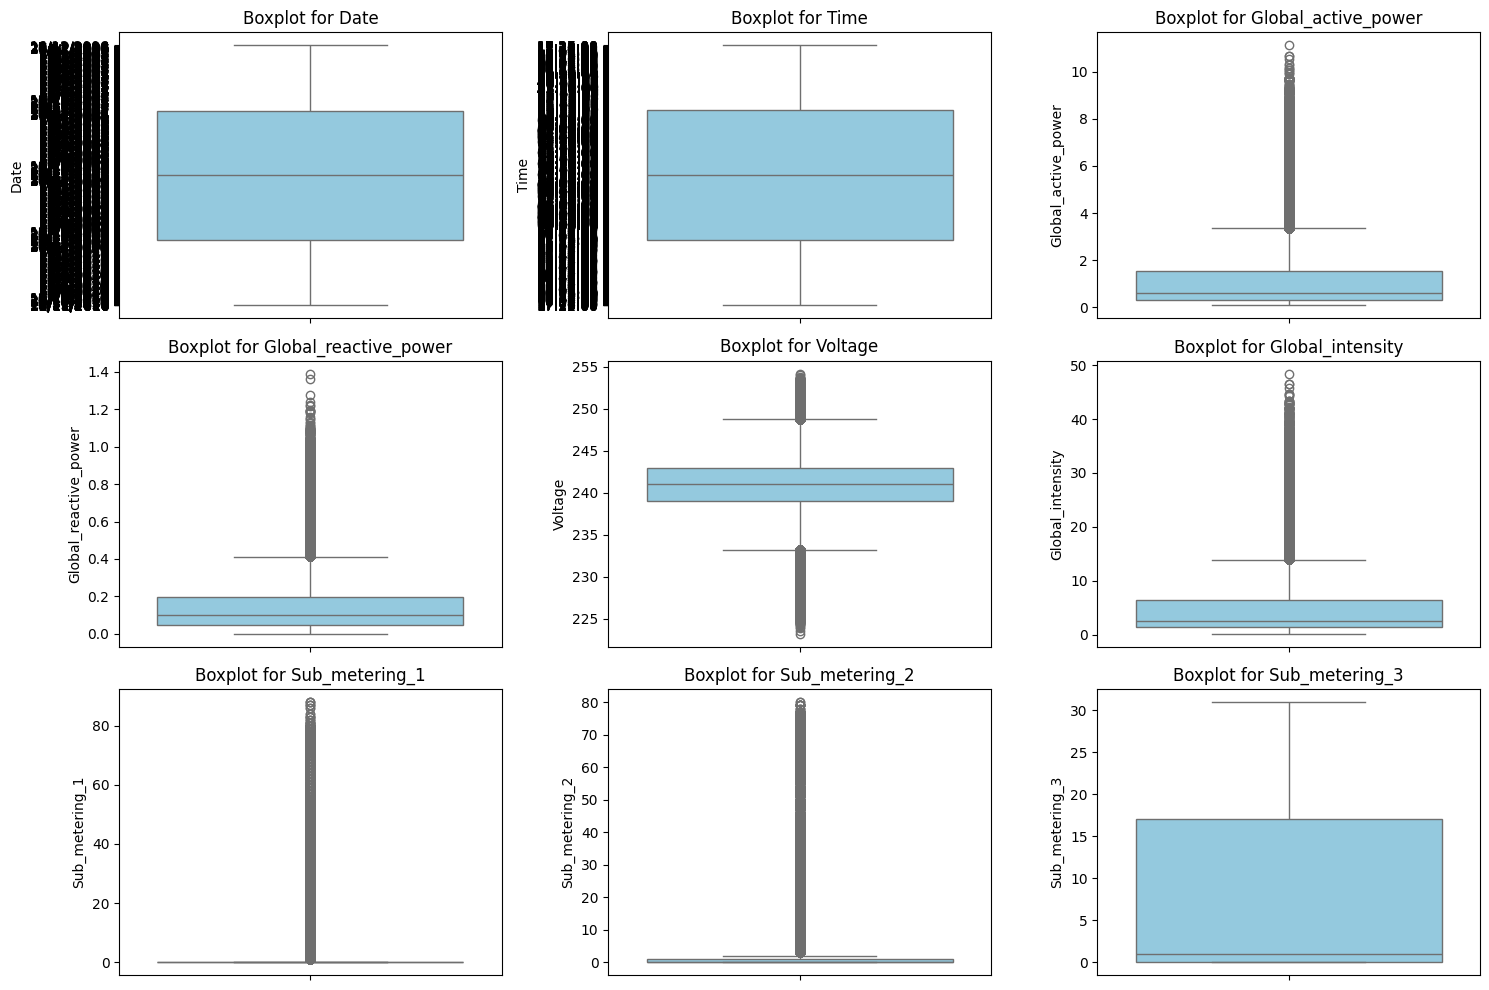

In [7]:
# Plotting Boxplots for Outlier Detection
plt.figure(figsize=(15, 10))
for idx, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, idx)  # Adjust grid size if needed
    sns.boxplot(data=df, y=column, color='skyblue')
    plt.title(f'Boxplot for {column}')
    plt.tight_layout()

plt.show()

**Insights:**

•	Outliers: Most of the outliers are on the higher side, especially for Global_active_power, Global_reactive_power, and the sub-metering zones. These represent potential areas for energy-saving opportunities.

•	Narrow Distributions: Variables like Voltage and Global_intensity show stable behavior, which is a positive sign for system reliability.

•	Sub_metering Zones: The differences in range among the sub-metering variables highlight unique patterns, suggesting opportunities for localized optimizations.


### 2. Data Preprocessing:

#### Handle missing or inconsistent data points

In [8]:
df.isnull().sum()/len(df)*100

Date                     0.000000
Time                     0.000000
Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64

#### Checking for Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

#### Parse date and time into separate features.

In [10]:
df['DateTime'] = df['Date'] + " " + df['Time']
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S', dayfirst=True)
df['Year'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S').dt.year
df['Month'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S').dt.month
df['Day'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M:%S').dt.day

# Feature Engineering
df['Hour'] = df['DateTime'].dt.hour
df['Month'] = df['DateTime'].dt.month
df['Weekday'] = df['DateTime'].dt.weekday

#df.drop(columns=['Date', 'Time'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   datetime64[ns]
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   DateTime               datetime64[ns]
 10  Year                   int32         
 11  Month                  int32         
 12  Day                    int32         
 13  Hour                   int32         
 14  Weekday                int32         
dtypes: datetime64[ns](3), float64(7), int32(5)
memory usage: 197.9 MB


#### Filling Null Values using Interpolate method since time series dataset

In [11]:
df.set_index("DateTime", inplace=True)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Weekday
DateTime,,,,,,,,,,,,,,
2006-12-16 17:24:00,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,5
2006-12-16 17:25:00,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,5
2006-12-16 17:26:00,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,5
2006-12-16 17:27:00,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,5
2006-12-16 17:28:00,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,5


In [ ]:
#Except Date & Time, ? present in all the columns
#cols = df.drop(columns=['Date','Time']).columns 
for icol in cols:
    df[icol] = pd.to_numeric(df[icol], errors='coerce') #Convert ? into NaN
    df[icol] = df[icol].interpolate(method='time')  #Filling NaN values by predicting using interpolate method since DateTime Series Data
df.to_csv("C:/Users/conta/OneDrive/Desktop/PowerPulse/household_power_consumption_modified.csv")

In [13]:
df.isnull().sum()/len(df)*100

Date                     0.0
Time                     0.0
Global_active_power      0.0
Global_reactive_power    0.0
Voltage                  0.0
Global_intensity         0.0
Sub_metering_1           0.0
Sub_metering_2           0.0
Sub_metering_3           0.0
Year                     0.0
Month                    0.0
Day                      0.0
Hour                     0.0
Weekday                  0.0
dtype: float64

#### Create additional features such as daily averages, peak hours, or rolling averages.

In [14]:
def detailed_summary(df):
    summary = df.describe().T
    summary['skew'] = df.skew()
    summary['kurtosis'] = df.kurtosis()
    return summary

detailed_summary(df.select_dtypes(include="float64"))

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Global_active_power,2075259.0,1.090280,1.052628,0.076,0.310,0.614000,1.528,11.122,1.791581,4.267891
Global_reactive_power,2075259.0,0.123649,0.112419,0.000,0.048,0.100000,0.194,1.390,1.263040,2.618110
Voltage,2075259.0,240.832785,3.237763,223.200,238.990,241.000000,242.870,254.150,-0.324918,0.710804
Global_intensity,2075259.0,4.621481,4.424361,0.200,1.400,2.751585,6.400,48.400,1.855325,4.656611
Sub_metering_1,2075259.0,1.109485,6.115843,0.000,0.000,0.000000,0.000,88.000,5.984475,36.148251
Sub_metering_2,2075259.0,1.289229,5.786613,0.000,0.000,0.000000,1.000,80.000,7.136054,58.677241
Sub_metering_3,2075259.0,6.442386,8.415860,0.000,0.000,1.000000,17.000,31.000,0.729779,-1.270887


In [15]:
# First, get daily average
daily_avg = df.groupby('Date').agg(dailyavg=('Global_active_power', 'mean')).reset_index()
daily_avg = daily_avg.sort_values('Date')

# Group by Date and Hour to get hourly averages
hourly_avg = df.groupby(['Date', 'Hour']).agg(hourlyavg=('Global_active_power', 'mean')).reset_index()

# Find peak hour per day (max hourly average)
peak_hours = hourly_avg.loc[hourly_avg.groupby('Date')['hourlyavg'].idxmax()]
peak_hours = peak_hours.rename(columns={'Hour': 'peak_hour'})

# 7-day rolling average
daily_avg['rolling_7d'] = daily_avg['dailyavg'].rolling(window=7, min_periods=1).mean()

In [16]:
# Merging the additional features to the main dataset
addnl_df = pd.merge(daily_avg, peak_hours[['Date', 'peak_hour']], on='Date', how='left')
final_df = pd.merge(df, addnl_df, on='Date', how='left')
final_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Weekday,dailyavg,rolling_7d,peak_hour
0,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,5,3.053475,3.053475,17
1,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,5,3.053475,3.053475,17
2,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,5,3.053475,3.053475,17
3,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,5,3.053475,3.053475,17
4,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,5,3.053475,3.053475,17


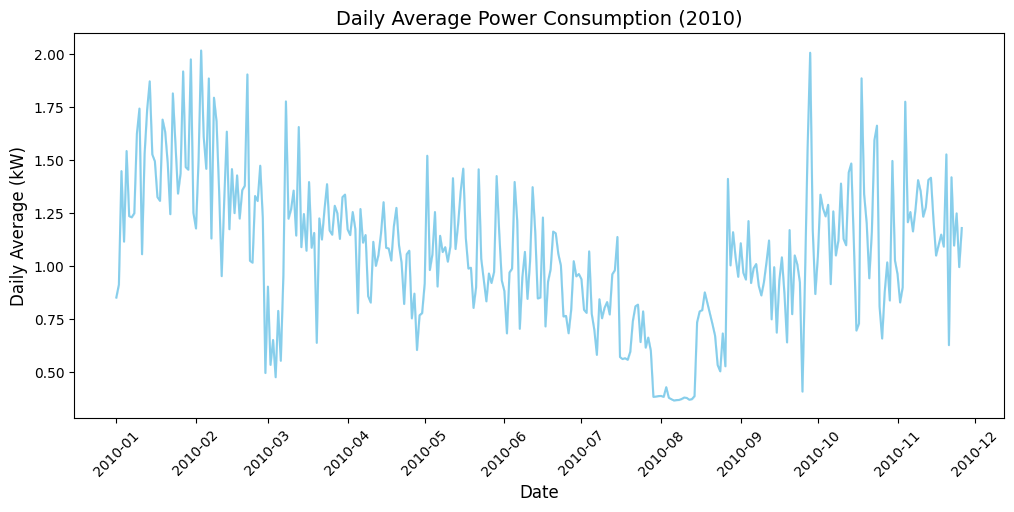

In [52]:
# Filter data for the year 2010
davg = final_df[final_df['Date'].dt.year == 2010]

# Set figure size for clarity
plt.figure(figsize=(12, 5))

# Create line plot using seaborn
sns.lineplot(data=davg, x="Date", y="dailyavg", color="skyblue")

# Labels and title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Average (kW)", fontsize=12)
plt.title("Daily Average Power Consumption (2010)", fontsize=14)

# Rotate x-axis for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

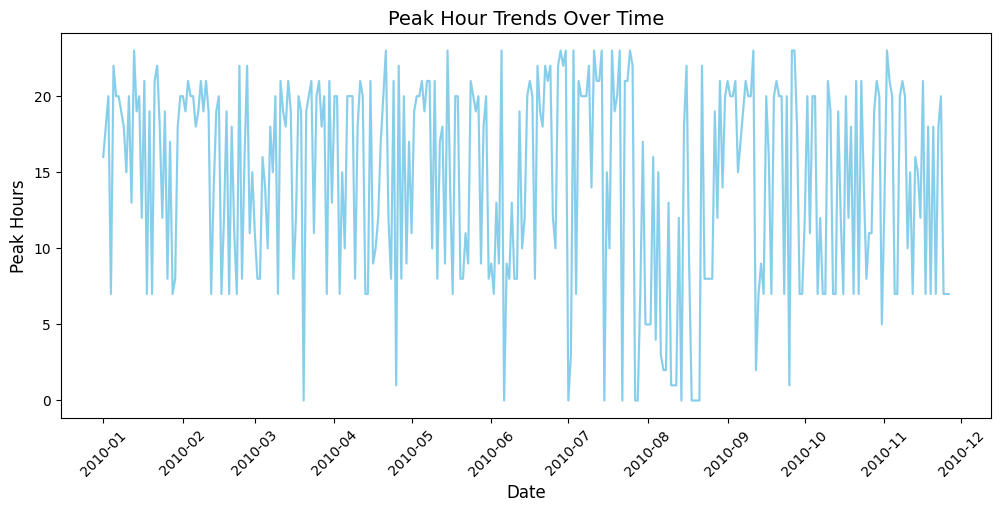

In [53]:
# Set figure size for better readability
plt.figure(figsize=(12, 5))

# Create line plot using Seaborn
sns.lineplot(data=davg, x="Date", y="peak_hour", color="skyblue")

# Labels and title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Peak Hours", fontsize=12)
plt.title("Peak Hour Trends Over Time", fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

#### Normalize or scale the data for better model performance

##### IQR Treatment - is Aggresive to this dataset as almost are values close to 0

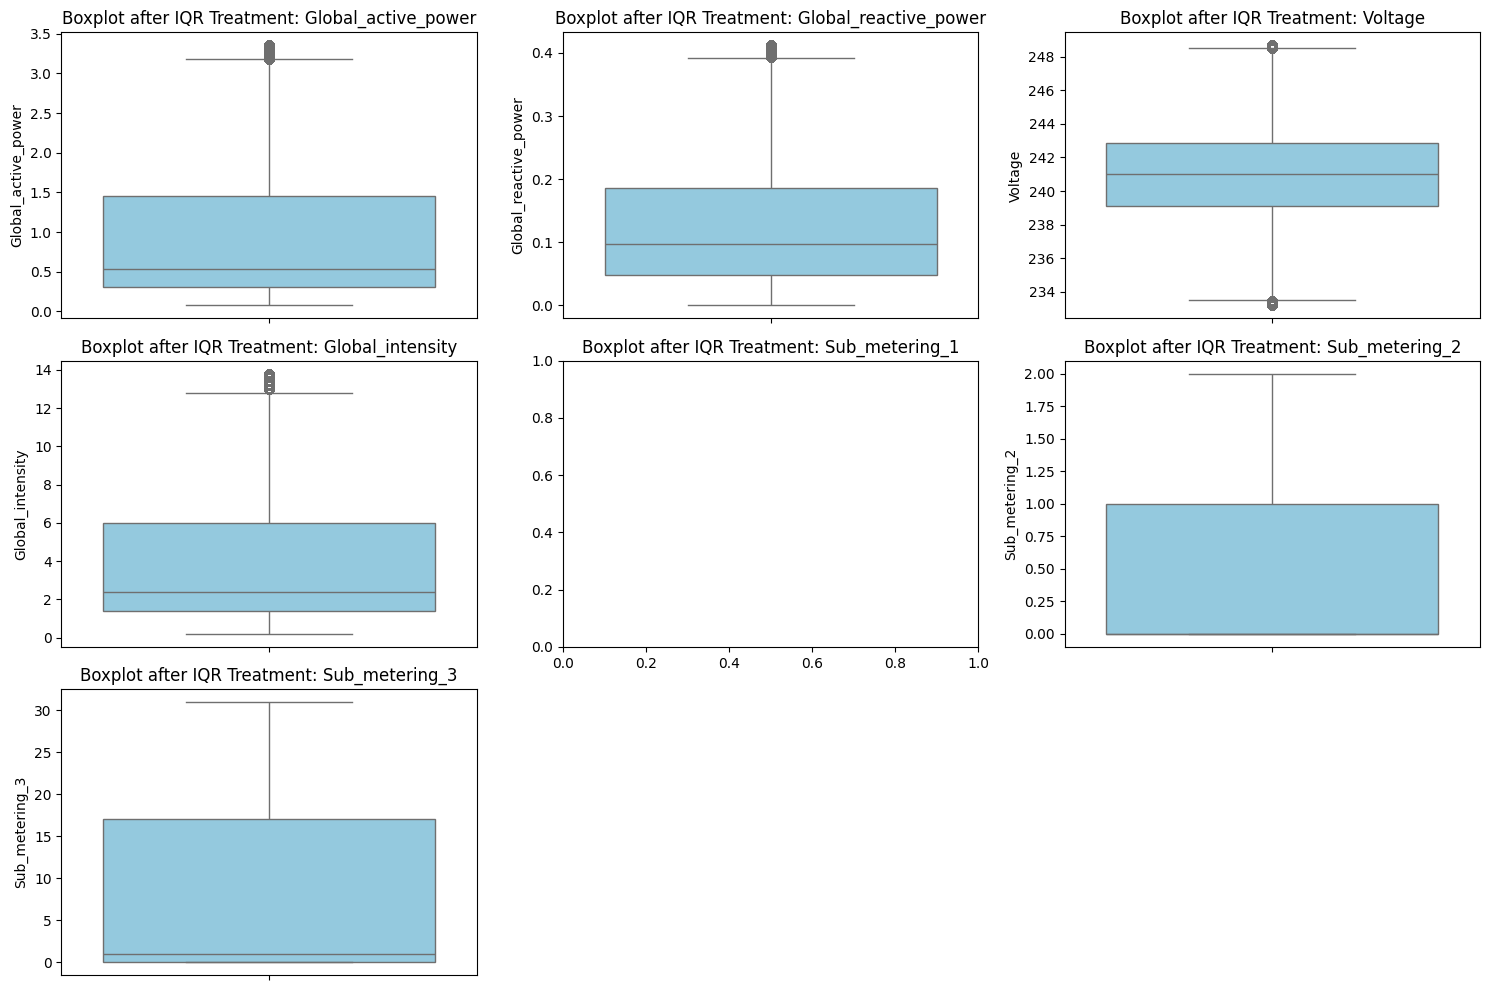

In [19]:
# Dictionary to store filtered data for each column
iqr_filtered_dfs = {}

plt.figure(figsize=(15, 10))
# Loop over numeric columns to apply IQR filtering
for idx, col in enumerate(cols,1):
    q1 = final_df[col].quantile(0.25)
    q3 = final_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Filter rows where the value is within the IQR bounds
    fdf_iqr = final_df[(final_df[col] > lower_limit) & (final_df[col] < upper_limit)]
    
    # Store the cleaned column
    iqr_filtered_dfs[col] = fdf_iqr
    
    plt.subplot(3, 3, idx)  # Adjust grid size if needed
    sns.boxplot(data=fdf_iqr, y=col, color='skyblue')
    plt.title(f'Boxplot after IQR Treatment: {col}')
    plt.tight_layout()
plt.show()

#### Log Transformation

In [21]:
# Apply log transformation (Adding 1 to avoid log(0) errors)
log_df = final_df.copy()
for icol in cols:
    log_df[icol] = np.log1p(final_df[icol])  # log(1 + x)

log_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Weekday,dailyavg,rolling_7d,peak_hour
0,2006-12-16,1900-01-01 17:24:00,1.651731,0.349247,5.463154,2.965273,0.0,0.693147,2.890372,2006,12,16,17,5,3.053475,3.053475,17
1,2006-12-16,1900-01-01 17:25:00,1.850028,0.361861,5.458010,3.178054,0.0,0.693147,2.833213,2006,12,16,17,5,3.053475,3.053475,17
2,2006-12-16,1900-01-01 17:26:00,1.852227,0.404131,5.456560,3.178054,0.0,1.098612,2.890372,2006,12,16,17,5,3.053475,3.053475,17
3,2006-12-16,1900-01-01 17:27:00,1.854421,0.406798,5.458479,3.178054,0.0,0.693147,2.890372,2006,12,16,17,5,3.053475,3.053475,17
4,2006-12-16,1900-01-01 17:28:00,1.540302,0.423960,5.466709,2.821379,0.0,0.693147,2.890372,2006,12,16,17,5,3.053475,3.053475,17


In [22]:
cols_for_model=log_df.drop(columns=["Date","Time"]).columns
cols_for_model

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'dailyavg',
       'rolling_7d', 'peak_hour'],
      dtype='object')

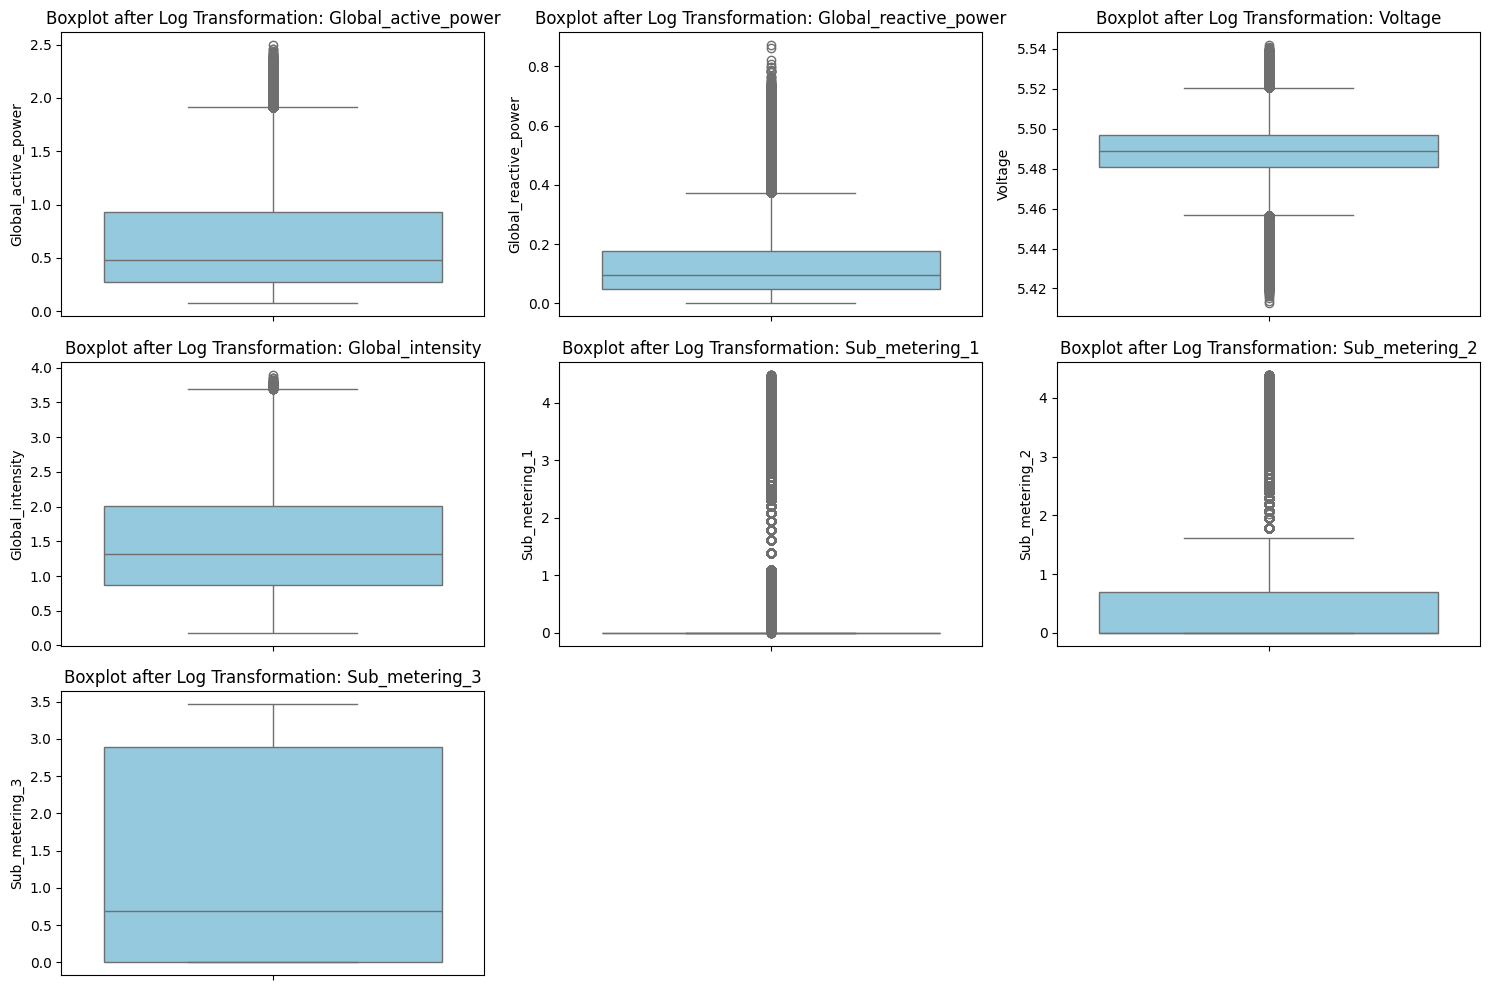

In [23]:
# Plotting Boxplots for Outlier Detection
plt.figure(figsize=(15, 10))
for idx, column in enumerate(cols, 1):
    plt.subplot(3, 3, idx)  # Adjust grid size if needed
    sns.boxplot(data=log_df, y=column, color='skyblue')
    plt.title(f'Boxplot after Log Transformation: {column}')
    plt.tight_layout()

plt.show()

#### Scaling

In [24]:
df_scaled = log_df.copy()
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler only to selected columns
df_scaled[cols_for_model] = scaler.fit_transform(log_df[cols_for_model])

# Preview
len(df_scaled)

2075259

In [25]:
detailed_summary(final_df.select_dtypes(include="float64"))

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Global_active_power,2075259.0,1.090280,1.052628,0.076000,0.310000,0.614000,1.528000,11.122000,1.791581,4.267891
Global_reactive_power,2075259.0,0.123649,0.112419,0.000000,0.048000,0.100000,0.194000,1.390000,1.263040,2.618110
Voltage,2075259.0,240.832785,3.237763,223.200000,238.990000,241.000000,242.870000,254.150000,-0.324918,0.710804
Global_intensity,2075259.0,4.621481,4.424361,0.200000,1.400000,2.751585,6.400000,48.400000,1.855325,4.656611
Sub_metering_1,2075259.0,1.109485,6.115843,0.000000,0.000000,0.000000,0.000000,88.000000,5.984475,36.148251
Sub_metering_2,2075259.0,1.289229,5.786613,0.000000,0.000000,0.000000,1.000000,80.000000,7.136054,58.677241
Sub_metering_3,2075259.0,6.442386,8.415860,0.000000,0.000000,1.000000,17.000000,31.000000,0.729779,-1.270887
dailyavg,2075259.0,1.090280,0.418780,0.173818,0.810778,1.079114,1.319790,3.314851,0.574280,1.240894
rolling_7d,2075259.0,1.093161,0.329755,0.178944,0.873866,1.099495,1.323033,3.053475,-0.039501,0.596292


In [26]:
detailed_summary(df_scaled[cols_for_model])

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Global_active_power,2075259.0,7.922299e-16,1.0,-1.319820,-0.859263,-0.370827,0.679387,4.348346,0.738645,-0.329802
Global_reactive_power,2075259.0,-7.516638e-16,1.0,-1.171928,-0.680865,-0.173640,0.685224,7.954084,0.912308,0.973957
Voltage,2075259.0,-2.245848e-13,1.0,-5.634165,-0.563233,0.058200,0.631732,4.000716,-0.377659,0.773709
Global_intensity,2075259.0,-1.414362e-15,1.0,-1.844407,-0.852297,-0.212916,0.759377,3.476681,0.387592,-0.916910
Sub_metering_1,2075259.0,-1.562657e-17,1.0,-0.236375,-0.236375,-0.236375,-0.236375,6.932636,4.937960,24.006311
Sub_metering_2,2075259.0,-2.282766e-16,1.0,-0.492279,-0.492279,-0.492279,0.557586,6.163706,3.219393,12.505823
Sub_metering_3,2075259.0,2.472859e-16,1.0,-0.913216,-0.913216,-0.380880,1.306585,1.748464,0.509662,-1.574692
Year,2075259.0,-6.975940e-14,1.0,-2.158810,-1.272816,-0.386823,0.499170,1.385164,-0.003750,-1.240996
Month,2075259.0,-1.419949e-16,1.0,-1.595650,-1.010129,-0.131847,0.746434,1.624716,0.002624,-1.195338
Day,2075259.0,-1.051814e-16,1.0,-1.681158,-0.884597,0.025759,0.822321,1.732677,-0.003266,-1.191059


In [28]:
df_scaled.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Weekday,dailyavg,rolling_7d,peak_hour
0,2006-12-16,1900-01-01 17:24:00,2.374620,2.486124,-1.862927,2.138866,-0.236375,0.557586,1.306585,-2.15881,1.624716,0.025759,0.794432,1.000514,4.687889,5.944754,0.255024
1,2006-12-16,1900-01-01 17:25:00,2.838736,2.618244,-2.246182,2.443422,-0.236375,0.557586,1.262688,-2.15881,1.624716,0.025759,0.794432,1.000514,4.687889,5.944754,0.255024
2,2006-12-16,1900-01-01 17:26:00,2.843882,3.060978,-2.354230,2.443422,-0.236375,1.171717,1.306585,-2.15881,1.624716,0.025759,0.794432,1.000514,4.687889,5.944754,0.255024
3,2006-12-16,1900-01-01 17:27:00,2.849017,3.088909,-2.211259,2.443422,-0.236375,0.557586,1.306585,-2.15881,1.624716,0.025759,0.794432,1.000514,4.687889,5.944754,0.255024
4,2006-12-16,1900-01-01 17:28:00,2.113820,3.268667,-1.598020,1.932908,-0.236375,0.557586,1.306585,-2.15881,1.624716,0.025759,0.794432,1.000514,4.687889,5.944754,0.255024


### 3. Feature Engineering:

#### Identify relevant features for predicting global active power consumption.

#### 1. Check Multicollinearity Using VIF

In [30]:
#X=log_df.drop(columns=["Global_active_power","Date","Time"],axis=1)
X=df_scaled[["Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]]
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("VIF Values:")
print(vif_data)


VIF Values:
                 Feature       VIF
0  Global_reactive_power  1.186710
1                Voltage  1.172019
2       Global_intensity  3.012587
3         Sub_metering_1  1.251347
4         Sub_metering_2  1.233346
5         Sub_metering_3  2.235935


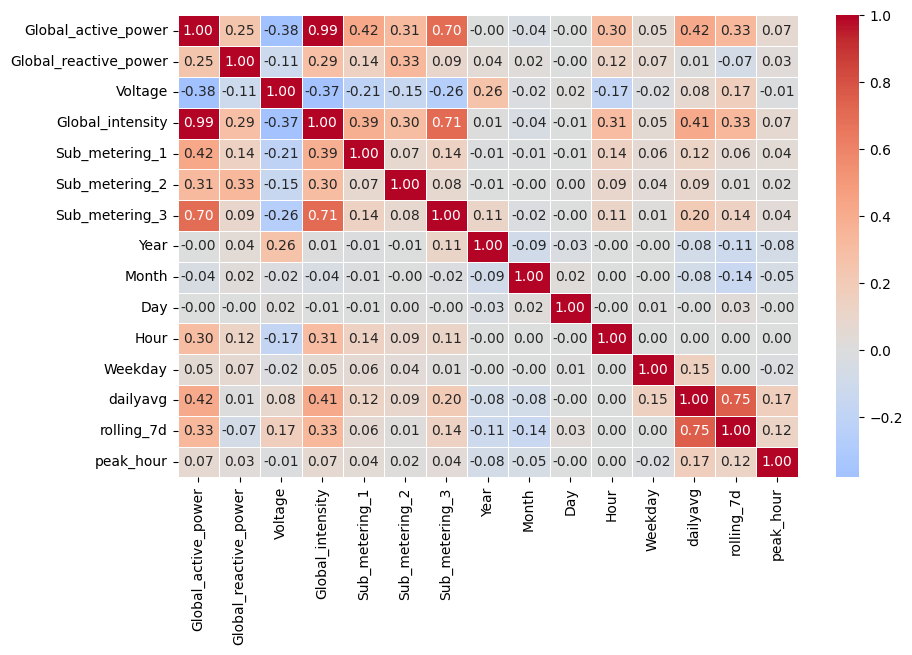

In [31]:
plt.figure(figsize=(10, 6))
corr_matrix = df_scaled.select_dtypes(include="float64").corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
# display the plot
plt.show()

#### 2. Feature Importance Using Tree-Based Models

In [206]:
#X=df_scaled.drop(columns=["Global_active_power","Date","Time"],axis=1)
X=df_scaled[["Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]]

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize models
rf = RandomForestRegressor(n_estimators=50, random_state=42)
gb = GradientBoostingRegressor(n_estimators=50, random_state=42)

# Train models
rf.fit(X, df_scaled['Global_active_power'])
gb.fit(X, df_scaled['Global_active_power'])

# Feature importance
rf_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by="Importance", ascending=False)
gb_importance = pd.DataFrame({'Feature': X.columns, 'Importance': gb.feature_importances_}).sort_values(by="Importance", ascending=False)

print("Random Forest Feature Importance:\n", rf_importance)
print("Gradient Boosting Feature Importance:\n", gb_importance)


Random Forest Feature Importance:
                  Feature  Importance
2       Global_intensity    0.997751
0  Global_reactive_power    0.000972
1                Voltage    0.000789
5         Sub_metering_3    0.000206
3         Sub_metering_1    0.000175
4         Sub_metering_2    0.000107
Gradient Boosting Feature Importance:
                  Feature  Importance
2       Global_intensity    0.999297
0  Global_reactive_power    0.000429
5         Sub_metering_3    0.000129
1                Voltage    0.000105
3         Sub_metering_1    0.000039
4         Sub_metering_2    0.000000


**Key Takeaway:**

✅ Keep Global Intensity → It is the strongest predictor.

⚠ Drop or reconsider Month, Weekday, Peak Hour, Rolling 7-Day Average → These features add little value.

🔄 Fine-tune Sub_metering values & Voltage → These may still contribute in certain cases.


#### 3. Feature importance from Linear Regression Coefficients

In [32]:
#X=log_df.drop(columns=["Global_active_power","Date","Time"],axis=1)
X=df_scaled[['Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3']]
from sklearn.linear_model import LinearRegression

# Train Linear Regression
lr = LinearRegression()
lr.fit(X, df_scaled['Global_active_power'])

# Get coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_}).sort_values(by="Coefficient", ascending=False)

print("Linear Regression Feature Importance:\n", coef_df)

Linear Regression Feature Importance:
                  Feature  Coefficient
2       Global_intensity     0.962181
3         Sub_metering_1     0.052459
4         Sub_metering_2     0.032688
5         Sub_metering_3     0.014357
1                Voltage    -0.006591
0  Global_reactive_power    -0.049848


**Key Takeaways**

📌 Global Intensity is the strongest predictor of energy usage.

📌 Sub-metering features contribute to energy consumption but vary in influence.

📌 Reactive Power has a mild negative effect, indicating possible inefficiencies in energy delivery.

📌 Voltage shows a weak inverse relationship, but it's not a major factor in predicting power usage.


### 4. Model Selection and Training:

#### Split the dataset into training and testing sets.

In [33]:
df_scaled.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Weekday,dailyavg,rolling_7d,peak_hour
0,2006-12-16,1900-01-01 17:24:00,2.374620,2.486124,-1.862927,2.138866,-0.236375,0.557586,1.306585,-2.15881,1.624716,0.025759,0.794432,1.000514,4.687889,5.944754,0.255024
1,2006-12-16,1900-01-01 17:25:00,2.838736,2.618244,-2.246182,2.443422,-0.236375,0.557586,1.262688,-2.15881,1.624716,0.025759,0.794432,1.000514,4.687889,5.944754,0.255024
2,2006-12-16,1900-01-01 17:26:00,2.843882,3.060978,-2.354230,2.443422,-0.236375,1.171717,1.306585,-2.15881,1.624716,0.025759,0.794432,1.000514,4.687889,5.944754,0.255024
3,2006-12-16,1900-01-01 17:27:00,2.849017,3.088909,-2.211259,2.443422,-0.236375,0.557586,1.306585,-2.15881,1.624716,0.025759,0.794432,1.000514,4.687889,5.944754,0.255024
4,2006-12-16,1900-01-01 17:28:00,2.113820,3.268667,-1.598020,1.932908,-0.236375,0.557586,1.306585,-2.15881,1.624716,0.025759,0.794432,1.000514,4.687889,5.944754,0.255024


In [34]:
# Sample dataset to speed up training
mdf = df_scaled.sample(frac=0.2, random_state=42)  # Use 20% of the data for faster execution

#X=mdf.drop(columns=["Global_active_power","Date","Time"],axis=1)
X=mdf[['Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3']]
y=mdf[["Global_active_power"]]

In [35]:
#Splitting the dataset into the traing set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [36]:
print("X Train: ", X_train.shape)
print("y Train: ", y_train.shape)
print("X Test: ", X_test.shape)
print("y Test: ", y_test.shape)

X Train:  (332041, 6)
y Train:  (332041, 1)
X Test:  (83011, 6)
y Test:  (83011, 1)


#### Train regression models such as Linear Regression, Random Forest, Gradient Boosting, and Neural Networks.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

def evaluate_model(name, model, params=None):
    if params:
        search = GridSearchCV(model, params, cv=3, scoring='r2', n_jobs=-1)
        search.fit(X_train, y_train)
        y_pred = search.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    })

#### Perform hyperparameter tuning to optimize model performance.

In [45]:
rf_params = {
    'n_estimators': [100],       # 100 is a strong default; 200 is often marginally better at high cost
    'max_depth': [None, 10]      # Keep "no limit" and a shallow depth
}
gb_params = {
    'n_estimators': [100],            # 100 is usually a sweet spot
    'learning_rate': [0.1],           # 0.1 is the default and often best performing
    'max_depth': [3, 5]               # Keep 3 (default) and one slightly deeper tree
}
mlp_params = {
    'hidden_layer_sizes': [(100,)],   # Default works well in most cases
    'activation': ['relu'], 
    'early_stopping': [True],          # Relu is faster and preferred for deep learning
    'alpha': [0.0001, 0.001]          # Keep both regularization strengths
}

In [ ]:
results = []
evaluate_model('Linear Regression', LinearRegression())
evaluate_model('Random Forest', RandomForestRegressor(random_state=42), rf_params)
evaluate_model('Gradient Boosting', GradientBoostingRegressor(random_state=42), gb_params)
evaluate_model('Neural Network', MLPRegressor(max_iter=1000, random_state=42), mlp_params)

### 5. Model Evaluation:

#### Evaluate models using appropriate metrics (e.g., RMSE, MAE, R-squared).

In [47]:
# Final comparison
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df.sort_values(by='R²', ascending=False))


Model Performance Comparison:
               Model       MAE       MSE      RMSE        R²
2  Gradient Boosting  0.023436  0.001321  0.036343  0.998682
1      Random Forest  0.024104  0.001418  0.037653  0.998586
3     Neural Network  0.024915  0.001425  0.037743  0.998579
0  Linear Regression  0.088937  0.013937  0.118054  0.986098


#### Compare model performance and select the best-performing model.

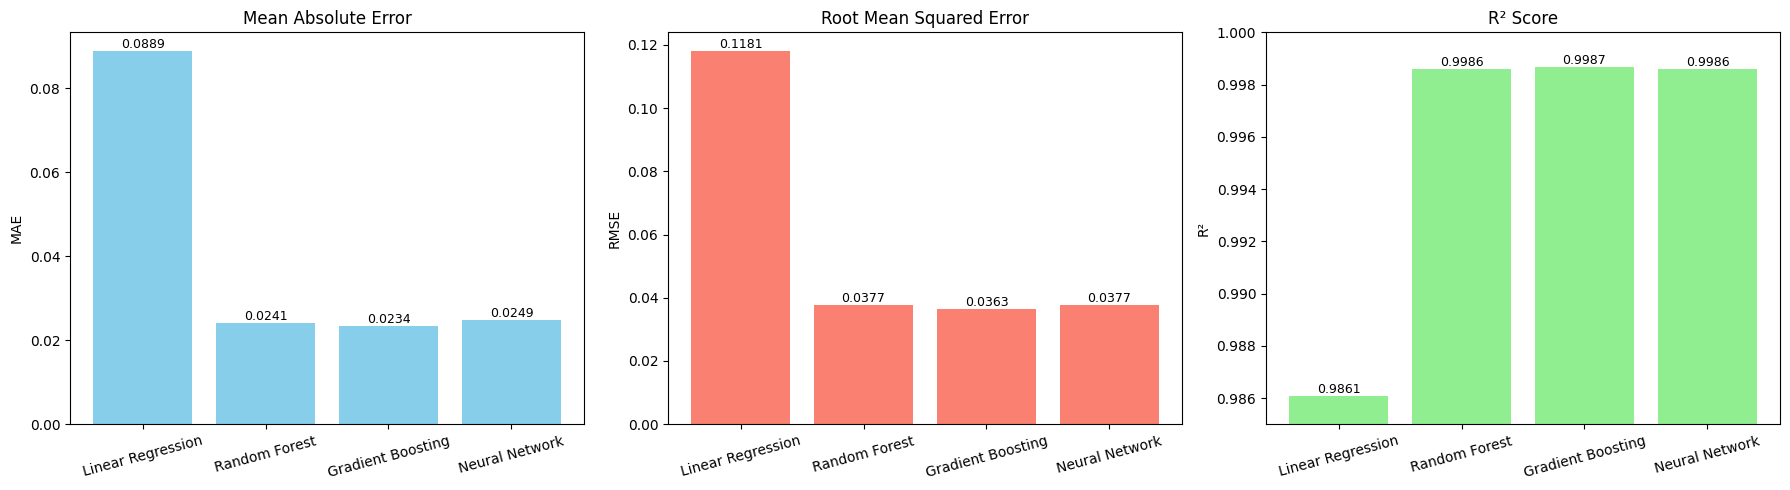

In [48]:
# Plot settings
metrics = ['MAE', 'RMSE', 'R²']
colors = ['skyblue', 'salmon', 'lightgreen']
titles = ['Mean Absolute Error', 'Root Mean Squared Error', 'R² Score']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    axes[i].bar(results_df['Model'], results_df[metric], color=colors[i])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=15)
    for index, value in enumerate(results_df[metric]):
        axes[i].text(index, value, f"{value:.4f}", ha='center', va='bottom', fontsize=9)
    if metric == 'R²':
        axes[i].set_ylim([0.985, 1.0])  # Focus in on high R² values

plt.tight_layout()
plt.show()

**Best Performing Model:**

📌 Gradient Boosting is the best overall performer, consistently showing the lowest error rates and highest accuracy.

📌 Random Forest and Neural Network models are close competitors, providing strong predictions with slightly higher error.

📌 Linear Regression performs the worst, reinforcing that non-linear models are better suited for energy usage predictions.

